# Imports

In [1]:
# Links:
# https://www.askpython.com/python/examples/stock-price-prediction-python
# https://www.codespeedy.com/predicting-stock-price-using-lstm-python-ml/

In [2]:
%%capture
# %%capture: Show now output for this cell
# Imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math

In [3]:
import access_api as api
from dataset import Dataset
from model import LSTM_model

2021-11-11 17:06:48.699840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 17:06:48.699861: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Define a date range
start_date = datetime(year = 2019, month = 11, day = 10)
end_date = datetime(year = 2021, month = 11, day = 10)
ticker_symbols = ["AAPL", "GOOG"]
pred_base_range = 60

In [5]:
# abnb = api.get_stock_data("ABNB", start_date)
# abnb_dataset = Dataset("ABNB", start_date, end_date, abnb, False)
# x_train, y_train, x_test, y_test, scaler = abnb_dataset.scaled_train_test_split()
# x_train, y_train, x_test, y_test = abnb_dataset.train_test_split()

In [6]:
AAPL = api.get_stock_data("AAPL", start_date)
AAPL_dataset = Dataset("AAPL", start_date, end_date, AAPL, True)
# x_train, y_train, x_test, y_test, scaler = btc_usd_dataset.scaled_train_test_split()
x_train, y_train, x_test, y_test = AAPL_dataset.train_test_split()

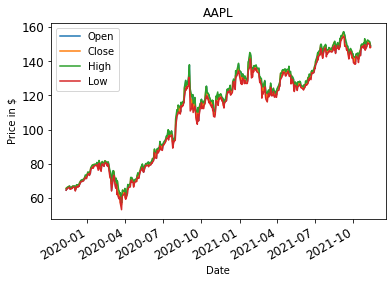

In [7]:
AAPL_dataset.plot_price_data()

In [8]:
# AAPL_model = LSTM_model("AAPL_model", "AAPL", start_date, end_date, pred_base_range)
# AAPL_model.train(x_train, y_train, batch_size=1, epochs=1)
# AAPL_model.engine.summary()

In [9]:
# btc_usd_dataset.df["Adj Close"].values

In [10]:
# btc_usd_model.predict_future(btc_usd_dataset.df["Adj Close"].values.reshape(-1, 1))

In [11]:
# # Define tickers for our testing
# tickers = ["ABNB", "BTC_USD", "GOOG", "AAPL"]

# # Define a date range
# start_date = datetime(2005, 1, 29)
# end_date = datetime.today()
# pred_base_range = 60

# # Define a dictionary to hold our LSTM models
# lstm_models = {}

# for ticker in tickers:
#     lstm_models[ticker] = LSTM_model(ticker + "_model", ticker, start_date, end_date, pred_base_range)
    
#     # Get the data, rescale it and divide it into training and test set
#     df = data.get_adj_close_df([ticker], start_date, end_date)
#     df_values = df.values
#     scaler, scaled_dataset = data.scale_data(df_values)
#     x_train, y_train, x_test, y_test, training_data_len = data.train_test_split(scaled_dataset, days = pred_base_range)
    
#     # Train a model with the data
#     model = create_model(input_shape = x_train.shape[1])
#     model.fit(x_train, y_train, batch_size=1, epochs=1)
#     model_dict["model"] = model

# Youtube Multivariate Time Series Prediction with LSTM and Multiple features

## Data Preprocessing

In [36]:
AAPL.to_csv("AAPL.csv")

In [28]:
dataset_train = AAPL
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)

print('Training set shape == {}'.format(dataset_train.shape))
print('Featured selected: {}'.format(cols))

Training set shape == (506, 6)
Featured selected: ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']


In [29]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (506, 6).


array([[6.56175003e+01, 6.45699997e+01, 6.45749969e+01, 6.55500031e+01,
        8.18212000e+07, 6.45905609e+01],
       [6.56975021e+01, 6.52300034e+01, 6.53874969e+01, 6.54899979e+01,
        8.73888000e+07, 6.45314484e+01],
       [6.61949997e+01, 6.52675018e+01, 6.52825012e+01, 6.61175003e+01,
        1.02734400e+08, 6.51497650e+01],
       ...,
       [1.51429993e+02, 1.50059998e+02, 1.50199997e+02, 1.50809998e+02,
        5.67879000e+07, 1.50809998e+02],
       [1.50130005e+02, 1.47850006e+02, 1.50020004e+02, 1.47919998e+02,
        6.50767000e+07, 1.47919998e+02],
       [1.49080002e+02, 1.48150101e+02, 1.48960007e+02, 1.48309998e+02,
        1.38198740e+07, 1.48309998e+02]])

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-1.62861345],
       [-1.62583682],
       [-1.60857007],
       [-1.60770234],
       [-1.59989328],
       [-1.58557661],
       [-1.58063078],
       [-1.59729034],
       [-1.61525111],
       [-1.622453  ],
       [-1.59416656],
       [-1.58791925],
       [-1.58080422],
       [-1.58063078],
       [-1.57846158],
       [-1.65412326],
       [-1.62132498],
       [-1.59893869],
       [-1.55460038],
       [-1.55633585],
       [-1.56266974],
       [-1.55373265],
       [-1.5410646 ],
       [-1.51729026],
       [-1.46965446],
       [-1.46115137],
       [-1.46002334],
       [-1.46627065],
       [-1.45351574],
       [-1.43963282],
       [-1.43407954],
       [-1.38991467],
       [-1.35529433],
       [-1.36640062],
       [-1.35781068],
       [-1.29776712],
       [-1.29794083],
       [-1.3033204 ],
       [-1.29516419],
       [-1.26444825],
       [-1.21247432],
       [-1.19303811],
       [-1.15486026],
       [-1.15052186],
       [-1.16848289],
       [-1

In [31]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (357, 90, 5).
y_train shape == (357, 1).


## Create a model

In [37]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

In [35]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

2021-11-11 17:43:35.690560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-11 17:43:35.690578: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-11 17:43:35.690593: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin-ThinkPad-T490): /proc/driver/nvidia/version does not exist
2021-11-11 17:43:35.690796: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

2021-11-11 17:53:57.967174: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-11 17:53:57.967198: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-11 17:53:57.968120: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-11 17:53:58.005556: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 0.7920

2021-11-11 17:54:00.334686: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-11 17:54:00.334709: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-11 17:54:00.387113: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-11 17:54:00.435227: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-11 17:54:00.551391: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_11_11_17_54_00

2021-11-11 17:54:00.627313: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2021_11_11_17_54_00/martin-ThinkPad-T490.trace.json.gz
2021-11-11 17:54:00.685106: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_11_11_17_54_00

2021-11-11 17:54:00.6

2/2 [==============================] - 3s 894ms/step - loss: 0.7920 - val_loss: 0.0517

Epoch 00001: val_loss improved from inf to 0.05169, saving model to weights.h5
Epoch 2/30
2/2 [==============================] - 0s 63ms/step - loss: 0.2326 - val_loss: 0.7067

Epoch 00002: val_loss did not improve from 0.05169
Epoch 3/30
2/2 [==============================] - 0s 63ms/step - loss: 0.1601 - val_loss: 0.4674

Epoch 00003: val_loss did not improve from 0.05169
Epoch 4/30
2/2 [==============================] - 0s 75ms/step - loss: 0.1019 - val_loss: 0.1886

Epoch 00004: val_loss did not improve from 0.05169
Epoch 5/30
2/2 [==============================] - 0s 72ms/step - loss: 0.1080 - val_loss: 0.2095

Epoch 00005: val_loss did not improve from 0.05169
Epoch 6/30
2/2 [==============================] - 0s 70ms/step - loss: 0.0856 - val_loss: 0.2744

Epoch 00006: val_loss did not improve from 0.05169
Epoch 7/30
2/2 [==============================] - 0s 72ms/step - loss: 0.0763 - val_loss

# Date processing methods

In [28]:
# # Get data for multiple ticker symbols
# data = get_stock_data(ticker_symbols, start_date)
# formated_data = tickers_as_columns(data)

# plot_data(title="Tech companies", df = formated_data)

## Train and store models

In [29]:

# ABNB_model = create_model("ABNB", "AirBNB Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# BTC_USD_model = create_model("BTC-USD", "BTC-USD Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# GOOG_model = create_model("GOOG", "Google Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# AAPL_model = create_model("AAPL", "Apple Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# save_model_dict(ABNB_model)
# save_model_dict(BTC_USD_model)
# save_model_dict(GOOG_model)
# save_model_dict(AAPL_model)

## Predict future data based on model

In [30]:
# df_btc_usd = get_adj_close_df(["BTC-USD"], start_date, end_date = datetime.today())
# df_btc_usd_values = df_btc_usd.values
# predict_future(df_values, loaded_model, n_days = 20)

## Test Bitcoin prediction for 500 days

In [31]:
# BTC_USD_model_500 = create_model("BTC-USD", "BTC-USD Model 500d", start_date, end_date = datetime.today(), pred_base_range = 500)
# save_model_dict(BTC_USD_model_500)

In [32]:
# predictions = predict_future(df_btc_usd_values, BTC_USD_model_500, n_days = 5)
# timerange = create_timerange_from_now(include_today = False, weekends = True)
# extend_df(df, predictions, timerange)

# Implement stock predictor
For your core stock predictor, implement:

A training interface that accepts a data range (start_date, end_date) and a list of ticker symbols (e.g. GOOG, AAPL), and builds a model of stock behavior. Your code should read the desired historical prices from the data source of your choice.
A query interface that accepts a list of dates and a list of ticker symbols, and outputs the predicted stock prices for each of those stocks on the given dates. Note that the query dates passed in must be after the training date range, and ticker symbols must be a subset of the ones trained on.

In [33]:
start_date = datetime(year = 2019, month = 11, day = 10)
end_date = datetime(year = 2021, month = 11, day = 10)
ticker_symbols = ["AAPL", "GOOG"]

In [35]:
data = api.get_adj_close_df(ticker_symbols, start_date, end_date).T.values

In [39]:
api.get_adj_close_df(ticker_symbols, start_date, end_date).T.values

array([[  64.59056854,   64.53144836,   65.14975739, ...,  150.44000244,
         150.80999756,  147.91999817],
       [1299.18994141, 1298.80004883, 1298.        , ..., 2987.0300293 ,
        2984.9699707 , 2932.52001953]])

In [38]:
data.T.values

array([[  64.59056854,   64.53144836,   65.14976501, ...,  150.44000244,
         150.80999756,  147.91999817],
       [1299.18994141, 1298.80004883, 1298.        , ..., 2987.0300293 ,
        2984.9699707 , 2932.52001953]])

In [ ]:
def training_interface(start_date, end_date, ticker_symbols):
    # Read historical prices
    data_df = api.get_adj_close_df(ticker_symbols, start_date, end_date)
    # Create array which has the tickers on the x-axis and the days on the y-axis 
    data_array = data_df.T.values
    # Caution - Currently we assume that we have a value for each ticker on each day - otherwise we need to either fill the missing values or traing with missing values (not sure how this could be done)
    
    
    # Create X_train, X_test and y_train and y_test
    
    # Option A - Create a own network for each ticker and use it for prediction of that ticker
    
    # Option B - Create one network which takes all the data in consideration
    
    

In [ ]:
def query_interface(date_list, ticker_symbols)

## Preprocess the data and divide it into train and test set

### Create model

In [ ]:
# first_lstm = create_model(input_shape = x_train.shape[1])
# first_lstm.fit(x_train, y_train, batch_size=1, epochs=1)
# store_model_keras("first_lstm", first_lstm)

### Load model from disk

In [ ]:
# google_model = load_model("Google Model")

In [ ]:
# model_dict = {}
# model_dict["name"] = "Google Model"
# model_dict["model"] = google_model
# model_dict["start_date"] = start_date
# model_dict["end_date"] = end_date
# model_dict["ticker_symbols"] = ["GOOG"]
# model_dict["pred_base_range"] =  pred_base_range

In [ ]:
# test_dates = []
# test_dates.append(datetime(year = 2021, month = 9, day = 15))
# test_dates.append(datetime(year = 2021, month = 9, day = 17))
# test_dates.append(datetime(year = 2020, month = 9, day = 17))
# test_dates.append(datetime(year = 2021, month = 10, day = 17))

In [ ]:
# # Making predictions on the testing data
# prediction = make_predictions(first_lstm, x_test)
# predictions = rescale_data(prediction, scaler)

In [ ]:
# prediction.shape

In [ ]:
# plot_approximation(filtered_data=filtered_data, training_data_len= training_data_len, predictions=predictions)

In [ ]:
# goog_price = predict_future(dataset, google_model)

In [ ]:
# dt1 = datetime(year = 2021, month = 9, day=20)
# dt2 = datetime(year = 2021, month = 9, day=24)
# dt_range  = pd.date_range(start = dt1, end = dt2)

In [ ]:
# google_prediction_df = pd.DataFrame(goog_price, index = dt_range, columns = ["Predicted GOOG price"])

In [ ]:
# google_prediction_df